In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version", torch.__version__)

PyTorch Version 1.13.1+cu116


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#grid for computing image, it subdivides the space
Y, X = np.mgrid[-0.05:0.05:0.00005, -0.8:-0.7:0.00005]
#Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)

In [3]:
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [4]:
for i in range(200):
    zs_ = zs*zs + z
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

In [5]:
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic), 
                         30+50*np.sin(a_cyclic), 
                         155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

<Figure size 1152x720 with 0 Axes>

C:\Users\kaias\AppData\Local\Temp\ipykernel_15572\1467450231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


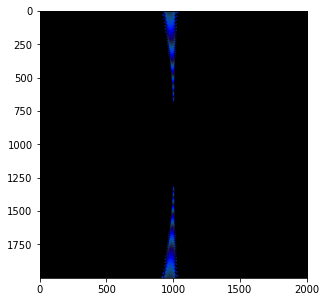

In [6]:
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#grid for computing image, it subdivides the space
Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)
c_real = torch.full_like(x, -0.8, device=device)
c_imag = torch.full_like(y, 0.156, device=device)
c = torch.complex(c_real, c_imag)
c = c.to(device)

In [5]:
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [6]:
for i in range(200):
    zs_ = zs*zs + c
    not_diverged = torch.abs(zs_) < 4.0
    ns += not_diverged
    zs = zs_

In [7]:
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic), 
                         30+50*np.sin(a_cyclic), 
                         155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

<Figure size 1152x720 with 0 Axes>

C:\Users\kaias\AppData\Local\Temp\ipykernel_8780\1467450231.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


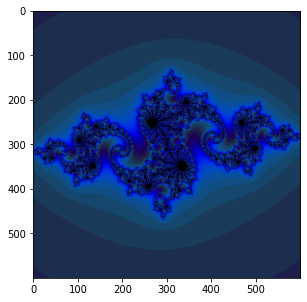

In [8]:
plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Both the Julia set and the Mandelbrot set are generated using the same iterative function 
f(z)=z^2 +c

 The Julia set is the set of all complex numbers such that iterating the function f(z) does not cause z to diverge to infinity. You fix the complex number c to different values to produce different Julia sets
 
The madelbrot initially sets z to be 0, and a point c is in the mandelbrot set if when used in the iteration of the algorithm, it does not diverge to infinity